In [2]:
# Load data1.csv, fix the single-column parsing issue, then show head and a few quick visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = 'data1.csv'
df_raw = pd.read_csv(csv_path)

# If the CSV got read as a single column (because the first row is a giant comma-separated string), re-read correctly
if df_raw.shape[1] == 1 and isinstance(df_raw.columns[0], str) and ',' in df_raw.columns[0]:
    df = pd.read_csv(csv_path, header=None)
    header_vals = df.iloc[0, 0].split(',')
    df = df.iloc[1:, 0].str.split(',', expand=True)
    df.columns = header_vals
    df.columns = [c.strip() for c in df.columns]
else:
    df = df_raw.copy()

# Convert what we can to numeric for plotting
for col_name in df.columns:
    df[col_name] = pd.to_numeric(df[col_name], errors='ignore')

print(df.head())

   Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
1   1          60       RL          65     8450   Pave    NA      Reg   
2   2          20       RL          80     9600   Pave    NA      Reg   
3   3          60       RL          68    11250   Pave    NA      IR1   
4   4          70       RL          60     9550   Pave    NA      IR1   
5   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
1         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
4         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
5         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
1   2008        WD         

C:\Users\bavag\AppData\Local\Temp\ipykernel_26240\4267067713.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col_name] = pd.to_numeric(df[col_name], errors='ignore')


### Visualizations
1) Distribution of SalePrice
This shows how home prices are spread out. In this dataset it’s typically right-skewed (more mid-priced homes, fewer very expensive ones).

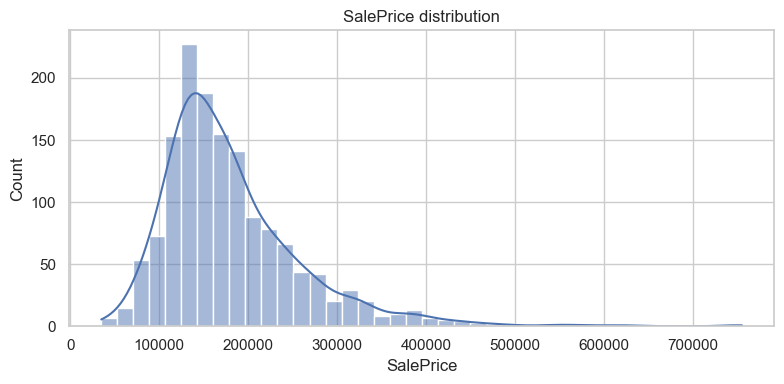

In [3]:
# Basic distributions for SalePrice and GrLivArea if present
sns.set_theme(style='whitegrid')

if 'SalePrice' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(pd.to_numeric(df['SalePrice'], errors='coerce').dropna(), bins=40, kde=True)
    plt.title('SalePrice distribution')
    plt.xlabel('SalePrice')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### 2) SalePrice vs GrLivArea (above-ground living area)
This is usually one of the strongest relationships in Ames Housing. You’ll often see a clear upward trend and a few outliers (very large homes that don’t follow the main pattern).

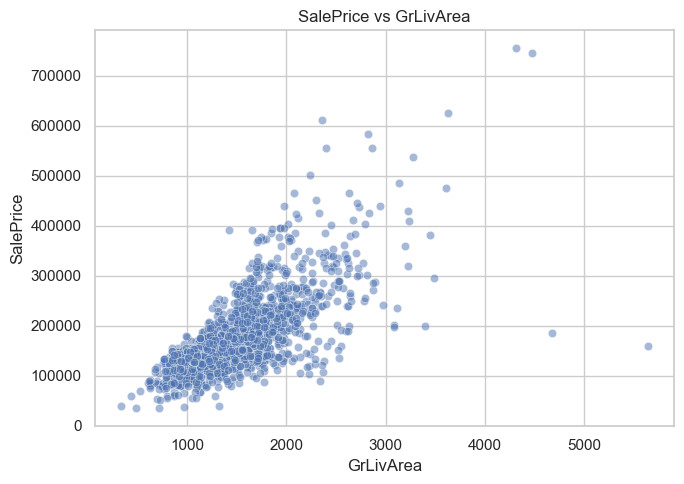

In [4]:
if 'GrLivArea' in df.columns and 'SalePrice' in df.columns:
    x_vals = pd.to_numeric(df['GrLivArea'], errors='coerce')
    y_vals = pd.to_numeric(df['SalePrice'], errors='coerce')
    plot_df = pd.DataFrame({'GrLivArea': x_vals, 'SalePrice': y_vals}).dropna()
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=plot_df.sample(min(2000, len(plot_df)), random_state=0), x='GrLivArea', y='SalePrice', alpha=0.5)
    plt.title('SalePrice vs GrLivArea')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

### 3) Correlation heatmap (top numeric features vs SalePrice)
This highlights which numeric variables move most with SalePrice (commonly OverallQual, GrLivArea, GarageCars/GarageArea, TotalBsmtSF, YearBuilt, etc.).

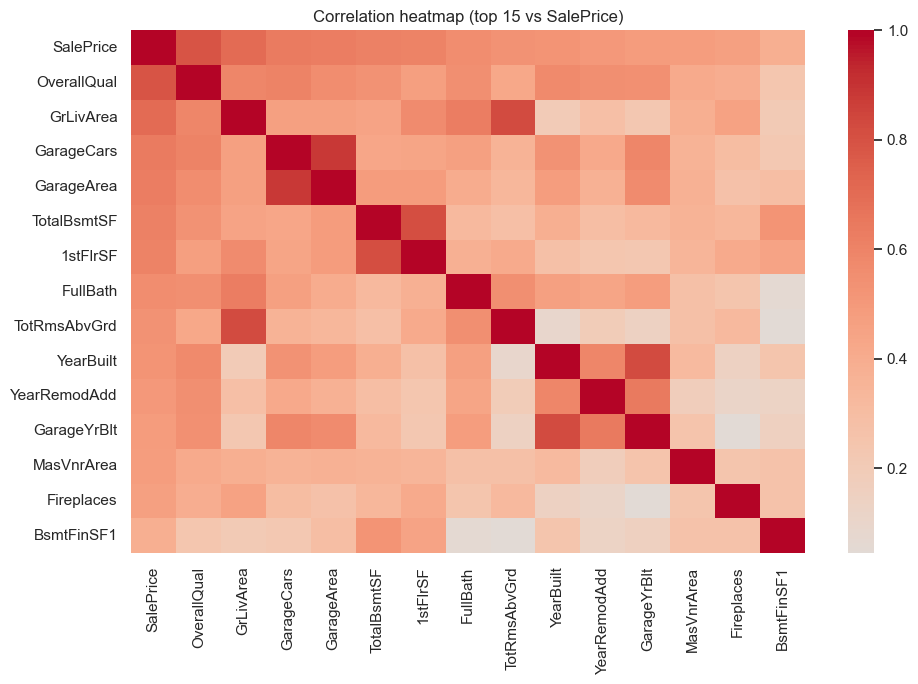

In [5]:
# Correlation heatmap for top numeric columns most correlated with SalePrice
numeric_df = df.apply(pd.to_numeric, errors='coerce')
if 'SalePrice' in numeric_df.columns:
    corr = numeric_df.corr(numeric_only=True)
    top_cols = corr['SalePrice'].abs().sort_values(ascending=False).head(15).index.tolist()
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr.loc[top_cols, top_cols], cmap='coolwarm', center=0, annot=False)
    plt.title('Correlation heatmap (top 15 vs SalePrice)')
    plt.tight_layout()
    plt.show()

### 4) SalePrice by Neighborhood (boxplots, top neighborhoods by frequency)
Great for spotting location effects. Some neighborhoods will have consistently higher medians and tighter ranges, others will be lower and/or more variable.

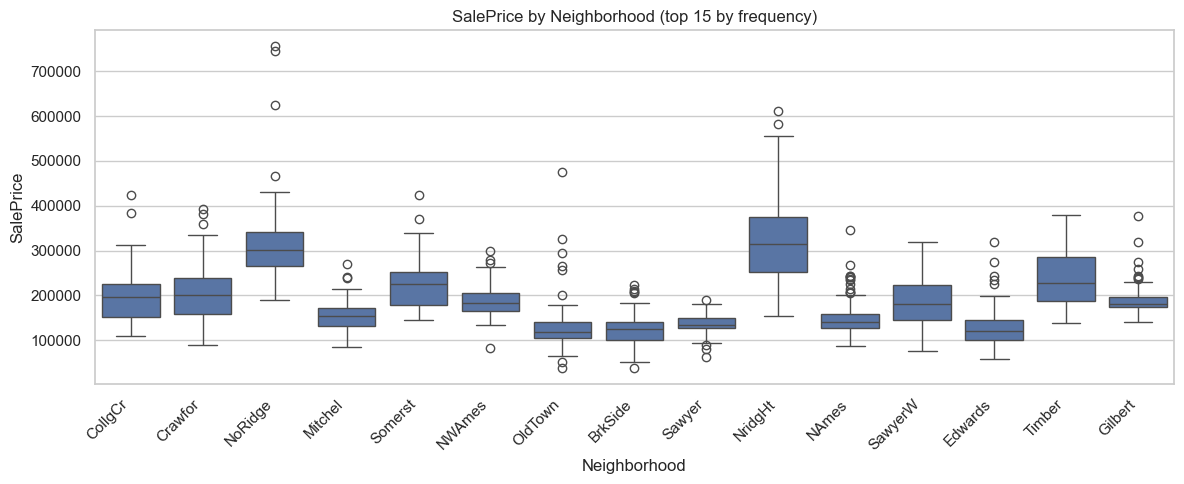

In [6]:
# Neighborhood boxplot if present
if 'Neighborhood' in df.columns and 'SalePrice' in df.columns:
    box_df = df[['Neighborhood', 'SalePrice']].copy()
    box_df['SalePrice'] = pd.to_numeric(box_df['SalePrice'], errors='coerce')
    box_df = box_df.dropna()
    # top 15 neighborhoods by count
    top_neigh = box_df['Neighborhood'].value_counts().head(15).index
    box_df = box_df[box_df['Neighborhood'].isin(top_neigh)]
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=box_df, x='Neighborhood', y='SalePrice')
    plt.xticks(rotation=45, ha='right')
    plt.title('SalePrice by Neighborhood (top 15 by frequency)')
    plt.tight_layout()
    plt.show()

         feature  importance_mean  importance_std
4    OverallQual         0.110177        0.014282
16     GrLivArea         0.075654        0.008799
12   TotalBsmtSF         0.037100        0.003720
26    GarageCars         0.035600        0.005755
13      1stFlrSF         0.024614        0.003225
6      YearBuilt         0.024396        0.004697
9     BsmtFinSF1         0.019976        0.001707
27    GarageArea         0.018120        0.004370
14      2ndFlrSF         0.014423        0.001521
7   YearRemodAdd         0.012430        0.002743
3        LotArea         0.010996        0.002490
24    Fireplaces         0.010086        0.003515
25   GarageYrBlt         0.008328        0.003377
23  TotRmsAbvGrd         0.008324        0.000794
19      FullBath         0.006252        0.002562
21  BedroomAbvGr         0.006127        0.001623
2    LotFrontage         0.003314        0.001031
20      HalfBath         0.003168        0.001224
29   OpenPorchSF         0.003092        0.001349


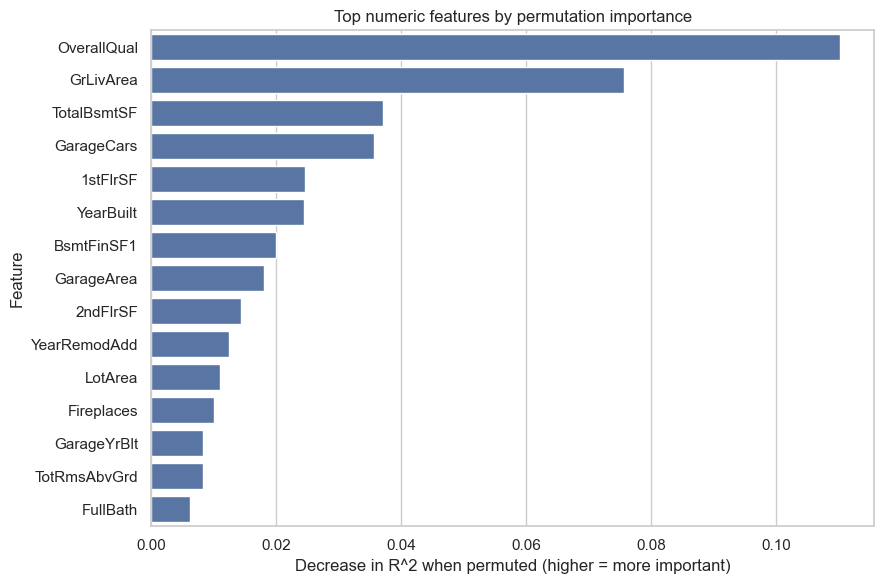

In [7]:
# Fix permutation importance length mismatch by using numeric features only (no one-hot expansion)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

work_df = df.copy()
y_vals = pd.to_numeric(work_df['SalePrice'], errors='coerce')
X_num = work_df.drop(columns=['SalePrice']).apply(pd.to_numeric, errors='coerce')

mask = y_vals.notna()
X_num = X_num.loc[mask]
y_vals = y_vals.loc[mask]

# Keep columns with at least some non-null values
valid_cols = [c for c in X_num.columns if X_num[c].notna().mean() > 0.05]
X_num = X_num[valid_cols]

X_train, X_test, y_train, y_test = train_test_split(X_num, y_vals, test_size=0.2, random_state=0)

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('model', RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1, max_features='sqrt'))
])

num_pipe.fit(X_train, y_train)

perm = permutation_importance(num_pipe, X_test, y_test, n_repeats=15, random_state=0, n_jobs=-1)

imp_df_num = pd.DataFrame({
    'feature': X_num.columns,
    'importance_mean': perm.importances_mean,
    'importance_std': perm.importances_std
}).sort_values('importance_mean', ascending=False)

print(imp_df_num.head(20))

sns.set_theme(style='whitegrid')
plt.figure(figsize=(9, 6))
sns.barplot(data=imp_df_num.head(15), y='feature', x='importance_mean', color='#4C72B0')
plt.title('Top numeric features by permutation importance')
plt.xlabel('Decrease in R^2 when permuted (higher = more important)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [9]:
pip install git

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
